In [1]:
import pandas as pd
import ast
import networkx as nx
import os
import matplotlib.pyplot as plt
# go one up
os.chdir("..")
plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

In [2]:
main_color = "#5b3d91"
vos_meta = pd.read_csv(f'data{os.sep}prepared{os.sep}vos_meta.csv')
vos_meta.head()

,VOS_ID,Authors,Title,Year,Citations,Source,Cluster,Links,Total link strength,Norm. citations
0,2,['Nick Bostrom'],Existential Risk Prevention As Global Priority,2013,387.0,Global policy,3,303.0,33.0,11.8575
1,3,['Nick Bostrom'],Existential Risks: Analyzing Human Extinction ...,2002,176.0,[no source],3,61.0,24.0,3.7625
2,4,"['Shahar Avin', ' Bonnie C. Wintle', ' Julius ...",Classifying Global Catastrophic Risks,2018,68.0,Futures,3,226.0,13.0,4.6723
3,7,"['Simon Beard', ' Lauren Holt', ' Asaf Tzachor...",Assessing Climate Change’S Contribution To Glo...,2021,41.0,Futures,3,287.0,56.0,5.3588
4,8,"['Alexey Turchin', ' David Denkenberger']",Classification Of Global Catastrophic Risks Co...,2018,53.0,Ai & society,1,208.0,22.0,3.6416


In [3]:
# Remove the unrelated clusters
num_papers_before = vos_meta.shape[0]
other_topic_clusters = [6, 7, 8, 14, 15, 16, 18, 19, 22, 23]
vos_meta = vos_meta[~vos_meta["Cluster"].isin(other_topic_clusters)]
num_papers_after = vos_meta.shape[0]
print(f"Removed {num_papers_before - num_papers_after} papers from unrelated clusters")

Removed 393 papers from unrelated clusters


In [4]:
nums = {}
for cluster_name, cluster in vos_meta.groupby("Cluster"):
    num_papers = cluster.shape[0]
    authors = cluster["Authors"].apply(ast.literal_eval)
    # Create a list of all the authors
    all_authors = [author for authors_list in authors for author in authors_list]
    # Remove the trailing whitespace from the authors
    all_authors = [author.strip() for author in all_authors]
    # Count how often each author appears
    author_counts = len(set(all_authors))
    nums[cluster_name] = {"num_papers": num_papers, "num_authors": author_counts}
nums

{1: {'num_papers': 329, 'num_authors': 600},
 2: {'num_papers': 226, 'num_authors': 636},
 3: {'num_papers': 221, 'num_authors': 365},
 4: {'num_papers': 140, 'num_authors': 273},
 5: {'num_papers': 106, 'num_authors': 327},
 9: {'num_papers': 67, 'num_authors': 83},
 10: {'num_papers': 50, 'num_authors': 91},
 11: {'num_papers': 48, 'num_authors': 94},
 12: {'num_papers': 40, 'num_authors': 88},
 13: {'num_papers': 39, 'num_authors': 60},
 17: {'num_papers': 22, 'num_authors': 84},
 20: {'num_papers': 12, 'num_authors': 15},
 21: {'num_papers': 10, 'num_authors': 18}}

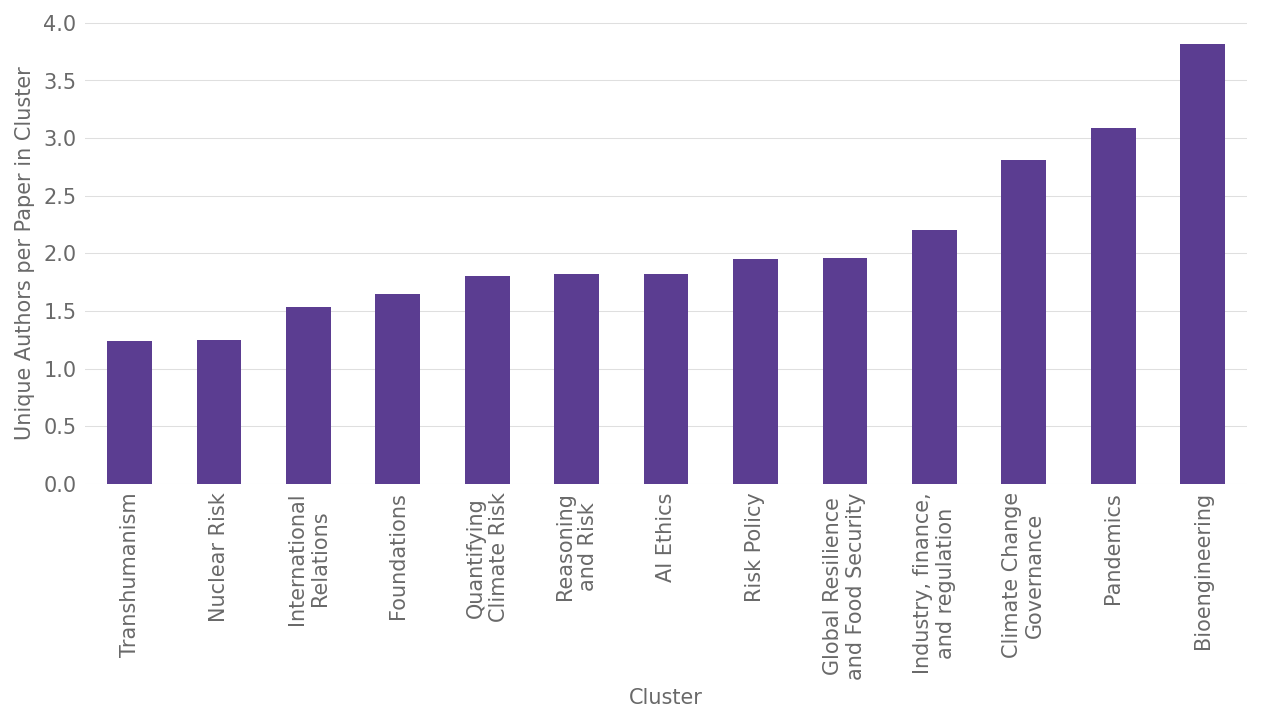

In [9]:
# Plot the average number of authors per paper
df = pd.DataFrame(nums).T
df.index = ["AI Ethics", "Climate Change\nGovernance", "Foundations", "Risk Policy", "Pandemics", "Transhumanism", "Reasoning\nand Risk", "Global Resilience\nand Food Security", "Industry, finance,\nand regulation", "International\nRelations", "Bioengineering", "Nuclear Risk", "Quantifying\nClimate Risk"]
df["avg_authors"] = df["num_authors"] / df["num_papers"]
df["avg_authors"].sort_values().plot(kind="bar", color=main_color)
plt.xlabel("Cluster")
plt.ylabel("Unique Authors per Paper in Cluster")
# remove x grid
plt.gca().xaxis.grid(False)
